# Statistics and Fitting in a Jupyter Notebook
## Introduction

In this Jupyter notebook the basic statistic functions, linear and non-linear fits are demonstrated.

## Imported Packages

In the following code cell some Python libraries for calculation, fitting, data import and results display are imported. The exact purpose of the libraries is indicated in the code cell as a comment after the hashtag #. Note that sometimes only certain modules from the packages are imported.

In [3]:
import numpy as np                                # library for data structures, vectors, matrices and mathematical functions
import matplotlib.pyplot as plt                   # library for plotting and visual representation
from matplotlib import rcParams                   # module handling generic plot parameters
from matplotlib.ticker import (FormatStrFormatter)# module for figure axis formatting
import pandas as pd                               # data administration, here used for data import
from scipy.optimize import curve_fit              # fitting algorithm from the scipy package
from IPython.display import display as dy, Markdown as md, Latex as Lx, Image as Im 
                                                  # displaying LaTeX code in code cells
import warnings

## Definition of the Plot Parameters

In [5]:
# figure size
height_cm = 15
width_cm = 20
height_inch = height_cm/2.54
width_inch = width_cm/2.54

# text font and size for figures
rcParams.update({'font.size': 22})
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma'] #other font styles possible
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
legendfontsize = 12
titlesize = 18

# axes tick size
ticksize = 100

## Definition of the Data File Path

In [9]:
datapath = 'C:/Users/MZ/Documents/Statistik/'

## Data Import

The experimental data are provided as ASCII files with one column. In the following code cell the data files are imported using pandas dataframes and are assigned to list.
File names are:
1. Statistics
      - numbers_1.dat
      - numbers_4.dat
      - w_4.dat
      - numbers_5.dat
      - linear_1.dat
2. ac Circuits
      - phase data: 
         - RC_phase.dat
         - RL_phase.dat
         - RCL_phase.dat (two columns: frequency (Hz) and time shift(ms))

In [14]:
### Statistics data

## Assign more convenient variables and work with pandas dataframes.
stat1 = pd.read_table(datapath+'numbers_1.dat')                            
stat4 = pd.read_table(datapath+'numbers_4.dat')                               
stat5 = pd.read_table(datapath+'numbers_5.dat')    
weight4 = pd.read_table(datapath+'w_4.dat')
lin1 = pd.read_table(datapath+'linear_1.dat')

### Phase data

## RC - assign more convenient variables and work with pandas dataframes
RC_phase = pd.read_table(datapath+'RC_phase.dat')                           # phase data RC series circuit

## RL - assign more convenient variables and work with pandas dataframes
RL_phase = pd.read_table(datapath+'RL_phase.dat')                           # phase data RL series circuit

## RLC - assign more convenient variables and work with pandas dataframes
RLC_phase = pd.read_table(datapath+'RCL_phase.dat')                         # phase data RCL series circuit

## phase in deg
phi_RC = 360*RC_phase['t (ms)']*1E-3*RC_phase['f (Hz)']
phi_RL = 360*RL_phase['t (ms)']*1E-3*RL_phase['f (Hz)']
phi_RCL = 360*RLC_phase['t (ms)']*1E-3*RLC_phase['f (Hz)']

## Calculation of basic parameters from descriptive statistics: Average, standard deviation, variance, standrad deviation of the mean

In [21]:
warnings.filterwarnings('ignore')

# Number of data values
l1 = len(stat1)
l4 = len(stat4)
l5 = len(stat5)
# Average values
ave1 = np.average(stat1)
ave4 = np.average(stat4)
ave5 = np.average(stat5)
# Weighted average
wave4 = np.average(stat4,weights=weight4)
# Standard deviations
std1 = np.std(stat1,ddof = 1)
std4 = np.std(stat4,ddof = 1)
std5 = np.std(stat5,ddof = 1)
# Variance
var1 = np.var(stat1,ddof = 1)
var4 = np.var(stat4,ddof = 1)
var5 = np.var(stat5,ddof = 1)
# Standard deviation of the mean
stdm1 = std1/np.sqrt(l1)
stdm4 = std4/np.sqrt(l4)
stdm5 = std5/np.sqrt(l5)
# Displaying the values
dy(Lx(r'$N$ = %i, Average = %.5f, Standard deviation = %.5f, Standard deviation of the mean = %.5f, Variance = %.5f' % (l1,ave1,std1,stdm1,var1)))
dy(Lx(r'$N$ = %i, Average = %.5f, Standard deviation = %.5f, Standard deviation of the mean = %.5f, Variance = %.5f' % (l4,ave4,std4,stdm4,var4)))
dy(Lx(r'$N$ = %i, Average = %.5f, Standard deviation = %.5f, Standard deviation of the mean = %.5f, Variance = %.5f' % (l5,ave5,std5,stdm5,var5)))
dy(Lx(r'Example for weighted average: $N$ = 10000, Average = %.5f, Weighted average = %.5f' % (ave4,wave4)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Linear Fits

In [24]:
### FIT FUNCTIONS

def linear(x, a, b):
  return a*x+b

x = lin1['x']
y = lin1['y']

# fit_linear[0][0:1] contains the values of the fit parameters a and b, 
# fit_linear[1][0:1][0:1] the covariance matrix with the variance of the fit parameters as diagonal elements.
fit_linear = curve_fit(linear, x, y)

print(fit_linear)
dy(Lx('$a =$ %.3f, $b =$ %.3f' % (fit_linear[0][0],fit_linear[0][1])))
dy(Lx('$u(a) =$ %.1e, $u(b) =$ %.1e' % (np.sqrt(fit_linear[1][0][0]),np.sqrt(fit_linear[1][1][1]))))
dy(Lx('$cov(a,b) =$ %.3f' % (fit_linear[1][0][1]/np.sqrt(fit_linear[1][0][0]*fit_linear[1][1][1]))))
dy(Lx('With correct number of decimals:'))
dy(Lx('$a \pm u(a) = $ %.4f $\pm$ %.0e' % (fit_linear[0][0],np.sqrt(fit_linear[1][0][0]))))
dy(Lx('$b \pm u(b) = $ %.2f $\pm$ %.0e' % (fit_linear[0][1],np.sqrt(fit_linear[1][1][1]))))

(array([ 0.11082955, -2.98649178]), array([[ 9.10568993e-08, -4.09756050e-06],
       [-4.09756050e-06,  2.77875309e-04]]))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Plotting of data and linear fit

<IPython.core.display.Latex object>

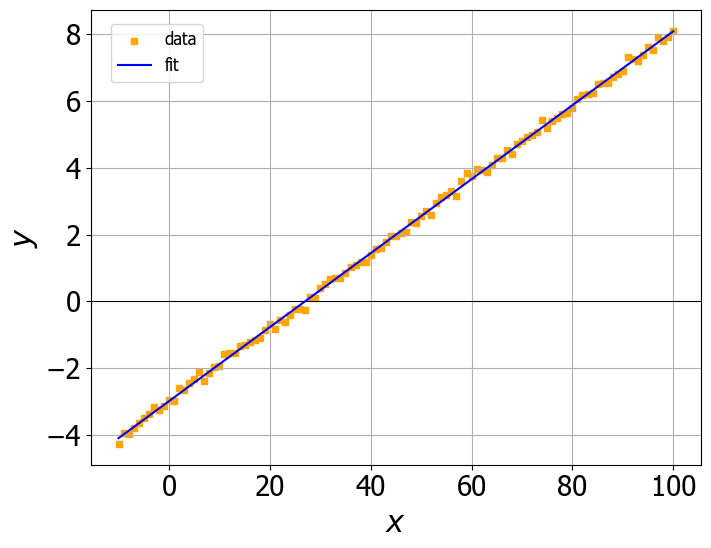

In [27]:
### PLOTS

## linear
fig1, ax1 = plt.subplots()
fig1.set_figheight(height_inch)
fig1.set_figwidth(width_inch)

ax1.grid('both')
ax1.axhline(0, linewidth=0.75, color='black')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
#ax1.set_ylim(-20,90)
#ax1.set_yticks(np.arange(-90,91,30))

# figure caption
dy(Lx(r'$Figure\, 1$: Linear scatter data. Solid line is a linear fit to the data.'))

#RC phase data and fit
ax1.scatter(lin1['x'], lin1['y'],marker = 's', color = 'orange', s = 25, label = 'data')
ax1.plot(lin1['x'], linear(lin1['x'], fit_linear[0][0], fit_linear[0][1]), color = 'blue', linewidth = 1.5, label = 'fit')
fig1.legend(bbox_to_anchor = (0.14, 0.87), loc = 'upper left', fontsize = legendfontsize)
plt.show()

## Non-linear Fit



In [29]:
### FIT FUNCTIONS

## fit functions for phase shift
def theta_rc(f, tau):
  return np.rad2deg(-np.arctan(1/(2*np.pi*f*tau)))
def theta_rl(f, delta):
  return np.rad2deg(np.arctan(np.pi*f/delta))
def theta_rcl(f, f0, delta):
  return np.rad2deg(np.arctan((2*np.pi)**2*(f**2-f0**2)/(4*np.pi*delta*f)))

### FITS

## phase fits
# The fitting parameters returned by curve_fit consist of two arrays.
# fit_RC[0][0] contains the value of the fit parameter tau, fit_RC[1][0] its variance.
# fit_RL[0][0] contains the value of the fit parameter delta, fit_RL[1][0] its variance.
# fit_RCL[0][0:1] contains the values of the fit parameters f0 and delta, fit_RC[1][0:1][0:1] 
# the covariance matrix with the variance of the fit parameters as diagonal elements.
fit_rc = curve_fit(theta_rc, RC_phase['f (Hz)'], phi_RC)
fit_rl = curve_fit(theta_rl, RL_phase['f (Hz)'], phi_RL)
fit_rcl = curve_fit(theta_rcl, RLC_phase['f (Hz)'], phi_RCL)

# LaTeX code to display the fitting results
dy(Lx(r'$\underline{\rm Fitting\, results}$'))
dy(Lx(r'from RC phase: $\tau =$ (%0.1f $\pm$ %0.1f) $\mu$s' % (1.0e+6*fit_rc[0][0],1.0e+6*np.sqrt(fit_rc[1][0]))))
dy(Lx(r'from RL phase: $\delta =$ (%0.0f $\pm$ %0.0f) s$^{-1}$' % (fit_rl[0][0],np.sqrt(fit_rl[1][0]))))
dy(Lx(r'from RCL phase: $f_0 =$ (%0.0f $\pm$ %0.0f) Hz, $\delta =$ (%0.0f $\pm$ %0.0f) s$^{-1}$' % 
      (fit_rcl[0][0],np.sqrt(fit_rcl[1][0][0]),fit_rcl[0][1],np.sqrt(fit_rcl[1][1][1]))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Plotting of data and non-linear fits

<IPython.core.display.Latex object>

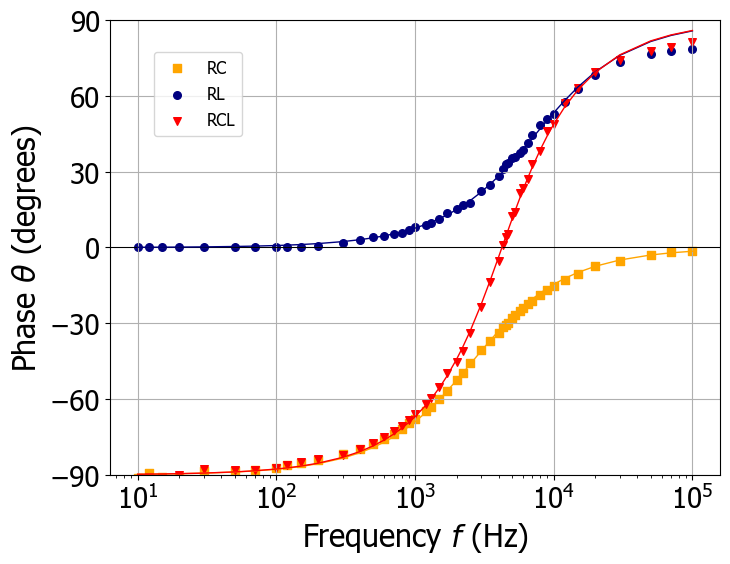

In [34]:
### PLOTS

## phase plot and fits
fig2, ax2 = plt.subplots()
fig2.set_figheight(height_inch)
fig2.set_figwidth(width_inch)

ax2.semilogx()
ax2.grid('both')
ax2.axhline(0, linewidth=0.75, color='black')
ax2.set_xlabel('Frequency $f$ (Hz)')
ax2.set_ylabel(r'Phase $\theta$ (degrees)')
ax2.set_ylim(-90,90)
ax2.set_yticks(np.arange(-90,91,30))

# figure caption
dy(Lx(r'$Figure\, 1$: Phase shift between current and voltage for the RC-, RL- and RCL-circuit. Solid lines are fits to the data.'))

#RC, RL and RCL phase data
ax2.scatter(RC_phase['f (Hz)'], phi_RC,
            marker = 's', color = 'orange', s = 30, label = 'RC')
ax2.scatter(RL_phase['f (Hz)'], phi_RL,
            marker = 'o', color = 'navy', s = 30, label = 'RL')
ax2.scatter(RLC_phase['f (Hz)'], phi_RCL,
            marker = 'v', color = 'red', s = 30, label = 'RCL')
fig2.legend(bbox_to_anchor = (0.17, 0.84), loc = 'upper left', fontsize = legendfontsize)

#RC, RL and RCL phase fits
ax2.plot(RC_phase['f (Hz)'], theta_rc(RC_phase['f (Hz)'], fit_rc[0][0]),
         color = 'orange', linewidth = 1.0, label = 'fit RC')
ax2.plot(RL_phase['f (Hz)'], theta_rl(RL_phase['f (Hz)'], fit_rl[0][0]),
         color = 'navy', linewidth = 1.0, label = 'fit RL')
ax2.plot(RLC_phase['f (Hz)'], theta_rcl(RLC_phase['f (Hz)'], fit_rcl[0][0], fit_rcl[0][1]),
         color = 'red', linewidth = 1.0, label = 'fit RCL')
plt.show()